In [ ]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Catboost, LightGBM, XGBoost

TODO: 
- Провести исследование и определить есть ли в данных мультеколенеарность
- Сравнить три главных алгоритма градиентного бустинга(Catboost, LightGBM, XGBoost)
Вам предстоит сделать несколько шагов для этого:
- Во время обработки данных исследовать есть ли мультеколенеарность и удалить столбцы если есть
- После randomforest построить модели бустинга и возможно подобрать параметры. (GridSearchCV не работает с catboost, там есть свой поиск)
- Сравнить результаты

In [ ]:
df = pd.read_csv('train_1.csv')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64


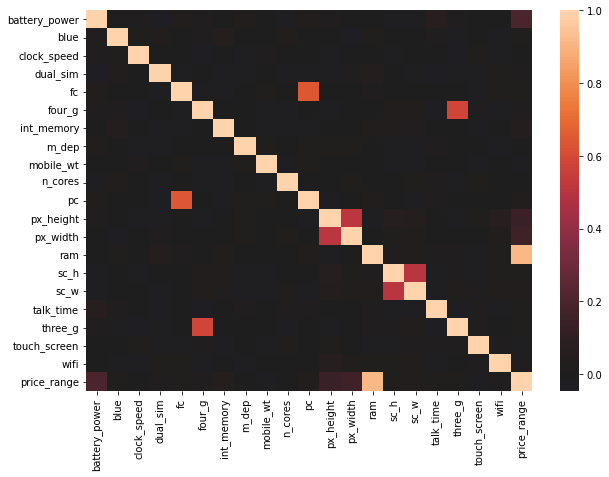

In [ ]:
print(df.corr()['price_range'])

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), center = 0)
plt.show()

Кароч у нас корррелируют некоторые столбики, но нам на них пофик и мы их удалили. Сказал я раньше, а потом увидел что тут высота пикселей и ширина пикселей (по пикселям) зависимы. Но стало хуже, так что я не стал удалять


In [ ]:
df_featured = df[df.columns[df.corr()['price_range'] > 0.05]]

df_featured

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


In [ ]:
X = df_featured.drop(columns = 'price_range')
y = df_featured['price_range'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

Котики МЯУ

In [ ]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1, 
    random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(data=X_test)

cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
print('accuracy - ', sklearn.metrics.accuracy_score(y_test, y_pred),
      'f1 score - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
print(cnf_matrix)

0:	learn: 1.2301652	total: 3.06ms	remaining: 303ms
1:	learn: 1.1156685	total: 6.66ms	remaining: 326ms
2:	learn: 1.0243056	total: 9.54ms	remaining: 308ms
3:	learn: 0.9453026	total: 12.5ms	remaining: 300ms
4:	learn: 0.8793305	total: 15.7ms	remaining: 299ms
5:	learn: 0.8289376	total: 18.6ms	remaining: 291ms
6:	learn: 0.7787903	total: 21.5ms	remaining: 285ms
7:	learn: 0.7305617	total: 26.7ms	remaining: 307ms
8:	learn: 0.6879308	total: 31ms	remaining: 314ms
9:	learn: 0.6497817	total: 35.7ms	remaining: 321ms
10:	learn: 0.6161915	total: 38.7ms	remaining: 313ms
11:	learn: 0.5840353	total: 41.7ms	remaining: 306ms
12:	learn: 0.5580578	total: 45.8ms	remaining: 306ms
13:	learn: 0.5330747	total: 48.9ms	remaining: 300ms
14:	learn: 0.5078868	total: 51.8ms	remaining: 293ms
15:	learn: 0.4852174	total: 54.8ms	remaining: 287ms
16:	learn: 0.4656477	total: 57.7ms	remaining: 282ms
17:	learn: 0.4474591	total: 60.7ms	remaining: 277ms
18:	learn: 0.4334029	total: 63.6ms	remaining: 271ms
19:	learn: 0.4175667	tot

На всех данных без всего
```
accuracy -  0.9275 f1 score -  0.9258874482233952
[[102   3   0   0]
 [  5  85   1   0]
 [  0   5  81   6]
 [  0   0   9 103]]
```


 На выбранных данных без всего

```
accuracy -  0.945 f1 score -  0.943518600871386
[[101   4   0   0]
 [  1  88   2   0]
 [  0   5  83   4]
 [  0   0   6 106]]
```

XGBOOST

In [ ]:
xg_cl = xgb.XGBClassifier(n_estimators=200, seed=123)

xg_cl.fit(X_train,y_train)
y_pred = xg_cl.predict(X_test)

cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
print('accuracy - ', sklearn.metrics.accuracy_score(y_test, y_pred),
      'f1 score - ', sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
print(cnf_matrix)

accuracy -  0.93 f1 score -  0.9284851554142922
[[ 99   6   0   0]
 [  3  87   1   0]
 [  0   6  82   4]
 [  0   0   8 104]]


На всех данных без всего
```
accuracy -  0.9 f1 score -  0.8977047813548035
[[100   5   0   0]
 [  5  82   4   0]
 [  0   7  78   7]
 [  0   0  12 100]]

```


 На выбранных данных без всего

```
accuracy -  0.93 f1 score -  0.9284851554142922
[[ 99   6   0   0]
 [  3  87   1   0]
 [  0   6  82   4]
 [  0   0   8 104]]

```